In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [67]:
books = pd.read_csv('book.csv',encoding='latin1',index_col=0)

In [68]:
books.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [69]:
books.sample(5)

,User.ID,Book.Title,Book.Rating
3233,712,Unless : A Novel,5
1732,278209,Senza Sangue,8
5468,2358,If the Buddha Dated: A Handbook for Finding Lo...,7
1791,278255,The Syndrome : A Thriller,4
4363,1733,Delta Style: Eve Wasn't a Size 6 and Neither Am I,9


In [70]:
books.shape

(10000, 3)

In [71]:
#renaming the columns
books1=books.rename({'User.ID':'userid','Book.Title':'title','Book.Rating':'rating'},axis=1)

In [72]:
books1.head()

,userid,title,rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [73]:
#no of unique userid
len(books1.userid.unique())

2182

In [74]:
books1['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [75]:
books1.title.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [76]:
#no of unique books
len(books1.title.unique())

9659

<AxesSubplot:>

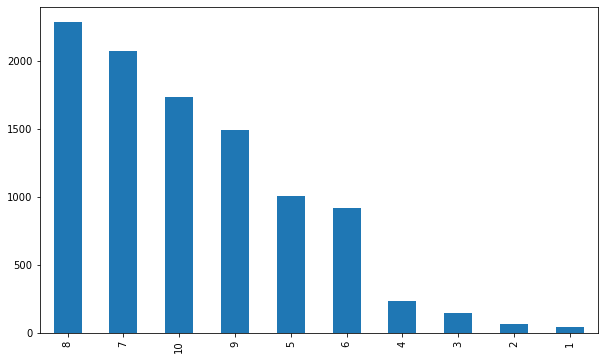

In [77]:
plt.figure(figsize=(10,6))
books1['rating'].value_counts().plot(kind='bar')

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [79]:
books1['title'].isnull().sum()

0

In [80]:
books1['rating'].isnull().sum()

0

In [81]:
tfidf_matrix = tfidf.fit_transform(books1['title'])

In [82]:
tfidf_matrix = tfidf.fit_transform(books1['title'])

In [83]:
tfidf_matrix.shape

(10000, 11435)

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


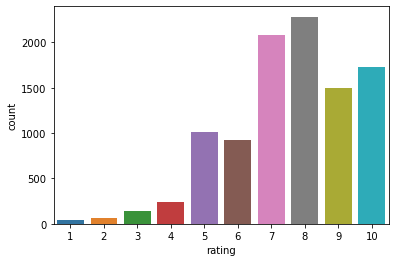

In [84]:
import seaborn as sns
sns.countplot(books1['rating'])
plt.show()

In [85]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

In [86]:
books_index = pd.Series(books1.index,index=books1['title']).drop_duplicates()

In [87]:
books_index

title
Classical Mythology                                                                                       1
Clara Callan                                                                                              2
Decision in Normandy                                                                                      3
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It        4
The Mummies of Urumchi                                                                                    5
                                                                                                      ...  
American Fried: Adventures of a Happy Eater.                                                           9996
Cannibal In Manhattan                                                                                  9997
How to Flirt: A Practical Guide                                                                        9998
Twilight              

In [88]:
books_index['Decision in Normandy']

3

In [105]:
def get_book_recommendations(Name,topN):
    #top N = 10 
    #getting the book index using its title
    book_id = books_index[Name]
    #getting the pair wise similarity score for all the anime's with that anime
    cosine_scores = list(enumerate(cosine_sim_matrix[book_id]))
    #sorting the cosine simalirity scores based on scores
    cosine_scores=sorted(cosine_scores,key=lambda x:x[1],reverse=True)
    #get the scores of top 10 most similar books
    cosine_scores_10 = cosine_scores[0:topN+1]
    #getting the book index 
    book_idx = [i[0] for i in cosine_scores_10]
    book_score = [i[1] for i in cosine_scores_10]
    #similar movies and scores
    book_similar_show = pd.DataFrame(columns=["title","rating"])
    book_similar_show["title"]=books1.loc[book_idx,'title']
    book_similar_show["rating"] = book_score
    #book_similar_show.drop(["index"],axis=1,inplace=True)
    print(book_similar_show)
    #return (anime_similar_show)

In [106]:
get_book_recommendations("The Mummies of Urumchi",topN=5)

                                                  title    rating
5                                The Mummies of Urumchi  1.000000
1429  Chicken Soup for the Mother's Soul (Chicken So...  1.000000
2377                           Man's Search For Meaning  0.801084
1411                                           Shopgirl  0.624005
4769                                    The Corrections  0.465029
1548  Secret Ceremonies: A Mormon Woman's Intimate D...  0.450221
